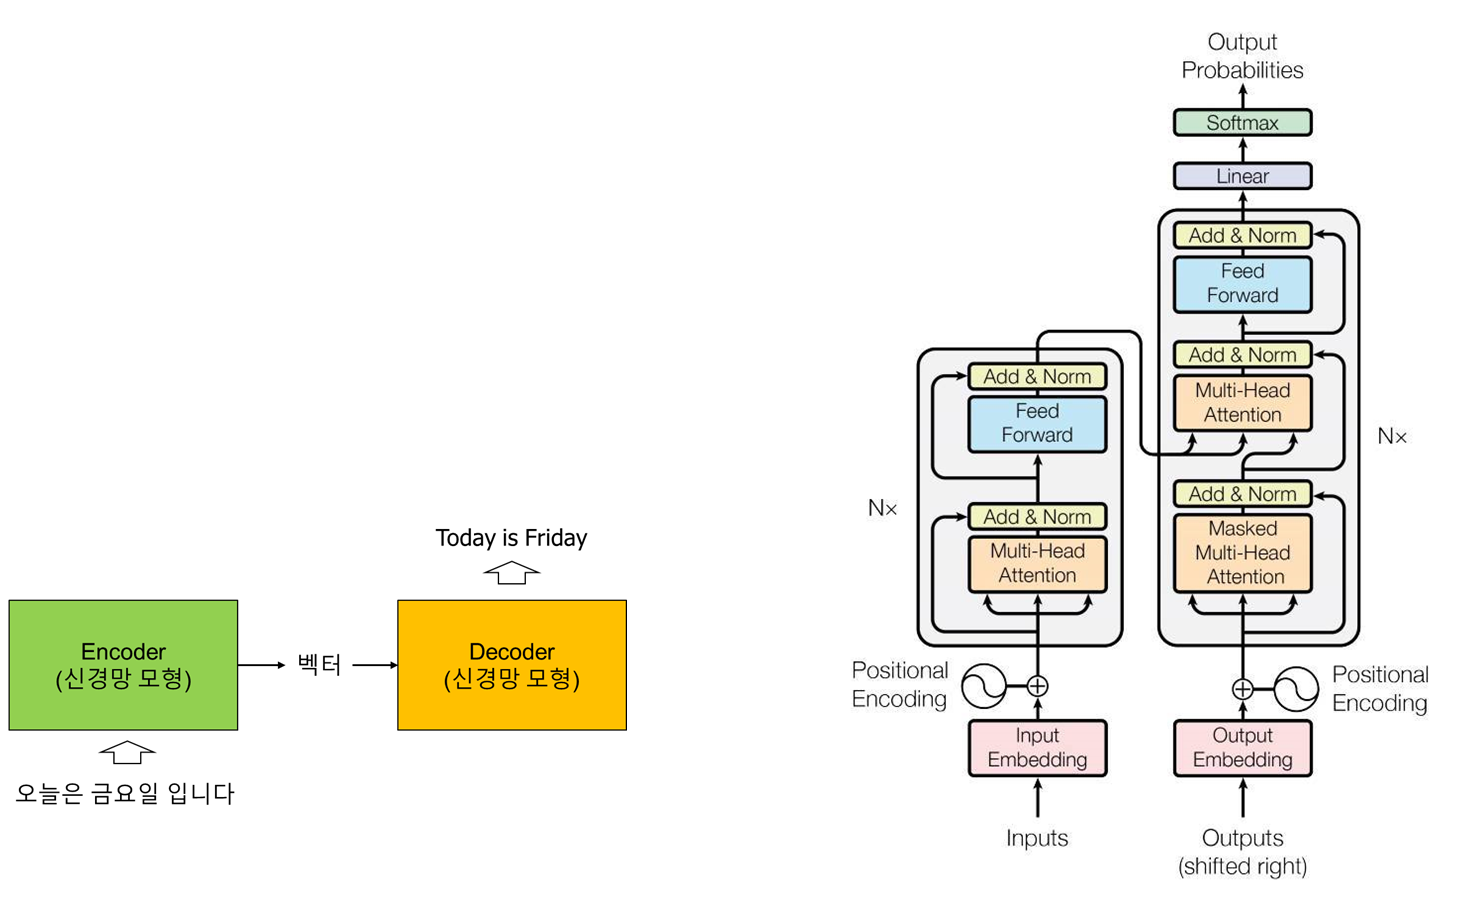

**BERTopic**
<br>
텍스트 데이터에서 토픽 추출, 시각화하는 Python 라이브러리<br>
Transformer 모델 기반<br>
대량의 문서에서 토픽을 자동으로 추출, 토픽들 사이의 관계 파악
<br><br>
**주요 기능**<br>
자동 토픽 수 검출<br>
토픽 감소: 유사한 토픽을 합치거나 너무 작은 토픽을 제거, 명확한 토픽 구조 세팅<br>
시각화
토픽 표현: 각 토픽을 대표하는 가장 중요한 단어들을 추출하여 토픽 설명<br>
동적 토픽 모델링: 시간에 따라 변하는 토픽의 트렌드를 추적

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# !pip install update BERTopic

In [3]:
# BERTopic 클래스 임포트하기
from bertopic import BERTopic

import pandas as pd
import numpy as np

2024-08-07 18:23:55.772585: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 18:23:55.791914: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 18:23:55.797633: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-07 18:23:55.813692: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-07 18:23:57.249522: W tensorflow/compiler/tf2

In [37]:
# 데이터 읽어오기
df = pd.read_csv('데니스  홍_20240807_09시51분07초.csv', engine='python')
df_1 = pd.read_csv('사람_20240806_09시46분11초.csv', engine='python')

# tokyo_2020_tweets.csv : 올림픽 관련 트윗 데이터

In [5]:
len(df)

57

In [46]:
docs = df['content'].to_list() # df에서 'text' 칼럼 추출, 리스트 형태로 변환
docs_2 = df_1['content'].to_list()
docs.extend(docs_2)


In [47]:
docs

["[\n\n\n\n\n    (서울=연합뉴스) 데니스 홍 미국 로스앤젤레스 캘리포니아대 기계공학과 교수팀이 지난 17∼21일(현지시간) 열린 국제 인공지능(AI) 로봇대회 '로보컵 2024'에서 우승했다고 24일 밝혔다. 사진은 '로보컵 2024' 경기를 준비하는 데니스 홍 교수팀의 휴머노이드 로봇 아르테미스(왼쪽)의 모습. 2024.7.24 [데니스 홍 교수 제공. 재판매 및 DB 금지]    photo@yna.co.kr\n]",
 '[\n국제 AI로봇대회 ‘로보컵’45개국 3000여명 참가2족 보행 아르테미스 우승\n\n\n\n 데니스 홍 교수세계적인 로봇공학자인 데니스 홍(한국명 홍원서·53) 미국 로스앤젤레스 캘리포니아대(UCLA) 기계공학과 교수팀이 최근 열린 국제 인공지능(AI) 로봇대회 ‘로보컵 2024’에서 우승했다.24일 동포사회에 따르면 17∼21일(현지시간) 네덜란드 에인트호번에서 열린 대회 ‘휴머노이드 어덜트’ 부문에서 홍 교수가 이끄는 로멜라 팀이 지난해 우승팀인 독일 본 대학의 님브로 팀을 누르고 우승을 차지했다. 로멜라 팀의 휴머노이드 로봇 ‘아르테미스’는 키 142cm, 몸무게 38kg의 2족 보행 로봇이다. 외부에서 발차기와 밀치기 등을 당해도 균형을 유지할 수 있고, 걷고 뛸 수 있으며, 공을 찰 수 있는 능력을 갖췄다.1996년에 창설돼 이듬해부터 매년 열리는 로보컵은 세계에서 가장 오래되고 규모가 큰 AI 로봇대회다. 2002년부터는 인간처럼 두 발로 공을 차는 휴머노이드 리그가 추가됐다. 올해 대회에는 45개국에서 선수 3천여명이 참가해 로봇 축구, 홈 서비스, 산업 자동화, 재난 구호 등의 부문에서 실력을 겨뤘다.2년 뒤인 2026년에는 인천에서 대회가 열린다. 홍 교수는 “아르테미스가 세계 최고의 휴머노이드 로봇이라는 것을 다시 한번 입증했다”며 “이번 승리가 로봇에 관심이 많은 젊은 친구들에게 꿈을 심어주고 ‘로보컵 2026’ 한국 개최를 홍보하는 데 도움이 됐으면 좋겠다”고 말했다.\n]',
 "[\n데니스 홍 교

In [48]:
import re

In [49]:
docs = [re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 .]', '', s) for s in docs]
docs = [re.sub(r'\s+', ' ', s) for s in docs]



In [52]:
docs[-3:]  # 처음 3개의 문서 확인

['교육공무직본부 지난해 교육부 학교급식 현황 분석노조 폐암 산재 낮은 임금 열악한 노동강도 원인노조 오는 일에 교육청과 집단 임금 실무교섭 개시세종뉴시스 전국학교비정규직연대회의가 총파업에 들어간 지난해 월일 세종시 한 고등학교에서 학생들이 빵과 음료로 이뤄진 대체급식을 받고 있다. 사진뉴시스. ... .세종뉴시스김정현 기자 지난해 전국 초중고 급식을 외주로 맡긴 학교가 전년도에 비해 이상 큰 폭으로 늘어난 것으로 조사됐다. 교육공무직 노동조합은 요리매연조리흄에 따른 폐암 산업재해와 낮은 임금 수준으로 인력난이 심화한 결과라고 보고 있다.일 교육부와 민주노총 공공운수노조 전국교육공무직본부 등에 따르면 지난해 전국 초중고 및 특수학교 만개교 중 도시락을 배달하거나 외부 업체에 운영을 맡긴 전부 위탁 학교는 곳.이었다.교내 조리 등 급식 운영을 위탁한 학교는 곳이고 도시락 등 외부운반 방식을 택한 학교는 곳이었다.이는 전년도의 개교 대비 . 불어난 것이다. 그간 매년 학교 급식을 전부 위탁한 학교는 여개교 초반 규모를 보였는데 지난해 갑자기 늘어난 것이다. 교육공무직본부가 교육부의 매년 학교급식 실시 현황 통계 보고서를 분석한 결과 지난 년부터 지난해까지 년 간 급식 전부위탁 학교 수는 곳곳곳곳곳곳으로 각각 조사됐다. 교육공무직본부는 지난해는 소위 급식실 결원 사태가 본격적으로 가시화되기 시작한 해라며 급식실 구인난이 영향을 미쳤다고 추정할 수 있다고 했다.교육공무직본부는 결원 사태의 원인으로 구조적 저임금 열악한 노동강도 높은 재해 위험성을 꾸준히 지적해 왔다며 문제가 해결되지 않으면 대표적 교육복지로 손꼽히는 친환경 무상급식 체계 자체가 흔들릴 수 있어 대책 마련을 촉구한다고 요구했다.교육계에서는 요리 매연이라 불리는 발암물질 조리흄에 노출돤 급식실 노동자들의 산업재해 문제가 심각하다는 지적이 계속돼 왔다. 여기에 전국 교육청과 노조 간의 교섭으로 정해지는 임금 수준도 그리 높아지지 않아 처우가 악화되고 있다는 게 노조 주장이다.김한울 교육공무직본부 정책기획국

In [53]:
len(docs)

132

In [54]:
# 모델 생성
# BERTopic 클래스의 인스턴스 생성
# language='english' 영어 데이터 처리
# nr_topics='auto'토픽 수 자동 결정  cf) nr_topics=10
# calculate_probabilities=True 각 문서가 각 토픽에 속할 확률을 계산하도록 설정합니다.

model = BERTopic(language='korean', nr_topics=10, calculate_probabilities=True)

In [55]:
# 모델 설정 내용, 하이퍼파라메터 확인
# print(vars(model))
print(model)

BERTopic(calculate_probabilities=True, ctfidf_model=ClassTfidfTransformer(...), embedding_model=None, hdbscan_model=HDBSCAN(...), language=korean, low_memory=False, min_topic_size=10, n_gram_range=(1, 1), nr_topics=10, representation_model=None, seed_topic_list=None, top_n_words=10, umap_model=UMAP(...), vectorizer_model=CountVectorizer(...), verbose=False, zeroshot_min_similarity=0.7, zeroshot_topic_list=None)


In [56]:
topics, probabilities = model.fit_transform(docs)
# 모델링 (input : 트위터 text)
# 각 문서의 topic 할당(topics)
# 각 문서가 각 topic에 속할 확률(probabilities)  리턴.

In [57]:
topics  # 문서의 topic 할당 결과

[-1,
 -1,
 3,
 2,
 2,
 3,
 3,
 -1,
 3,
 -1,
 3,
 -1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 -1,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 -1,
 3,
 2,
 -1,
 1,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 0,
 0,
 1,
 1,
 3,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 3,
 0,
 1,
 0,
 2,
 2,
 0,
 2,
 1,
 0,
 0,
 -1,
 0,
 2,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 3,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 -1,
 -1,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 -1,
 0,
 -1,
 0]

In [58]:
# 첫 번째 문서가 할당된  topic
topics[0]

-1

In [59]:
# topic 수
len(probabilities[0])

4

In [60]:
probabilities[0]  # 첫 번째 문서의 각 토픽별 할당 확률

array([0.05080934, 0.08047989, 0.07469581, 0.2186164 ])

In [61]:
# 가장 높은 확률 값을 가진 topic 번호
max_topic_index = np.argmax(probabilities[1])

print("topic index:", max_topic_index)
print("probabilities:", probabilities[1][max_topic_index])

topic index: 3
probabilities: 0.20264959289942938


In [62]:
model.get_topic_info() # topic 정보 요약

# Topic: topic 고유 번호
# Count: 해당 topic에 속하는 문서 수
# Name: topic명 - topic을 대표하는 주요 단어로 단어로 구성
# Representation: topic을 가장 잘 대표하는 단어들의 리스트
# Representative_Docs: 해당 topic에 속하는 대표적인 문서들.

,Topic,Count,Name,Representation,Representative_Docs
0,-1,14,-1_데니스_로봇_미국_파리,"[데니스, 로봇, 미국, 파리, 있다, 여자, 가장, 최고의, 교수, 그의]",[데니스 홍 교수 학술대회서 수상최종 후보 명 중 명이 한인 과학자오혜진 교수팀 최...
1,0,39,0_있다_지난_것으로_폭염,"[있다, 지난, 것으로, 폭염, 가장, 오후, 따르면, 같은, 나타났다, 전국]",[온열질환 추정 사망자 속출전국 가축 만마리 떼죽음강릉 일 연속 열대야 기록폭염이 ...
2,1,19,1_합니다_있다_의원은_대표가,"[합니다, 있다, 의원은, 대표가, 상속세, 이재명, 해리스, 있습니다, 대한, 있는]",[한동훈 국민의힘 대표가 지난 일 오전 서울 영등포구 여의동 당사로 출근하고 있다....
3,2,38,2_글로컬_있다_교육_미래교육,"[글로컬, 있다, 교육, 미래교육, 대한민국, 데니스, 있는, 주제로, 미래, 이번]",[일 개막 글로컬 미래교육박람회 섹션별 세부 계획 확정마이클 샌델 등 석학 토론미래...
4,3,22,3_로봇_교수는_데니스_로봇을,"[로봇, 교수는, 데니스, 로봇을, 그는, 로봇이, 말했다, 있다, 로봇은, 있는]",[이정아 기자의 바람난 과학 로봇공학자 데니스 홍 교수로봇을 만드는 사람이 될 거야...


In [63]:
model.get_topic(3)  # topic 3의 상세 내용 확인.

[('로봇', 0.06452690230219424),
 ('교수는', 0.03122955092001504),
 ('데니스', 0.029264300914242463),
 ('로봇을', 0.02758074723851877),
 ('그는', 0.025480704533375042),
 ('로봇이', 0.021796901889930356),
 ('말했다', 0.021788800968465503),
 ('있다', 0.021678393723773733),
 ('로봇은', 0.020672402489731186),
 ('있는', 0.020022942730797473)]

In [65]:
model.visualize_barchart(top_n_topics=8) # 높은 비중을 차지하는 8개의 topic의 내용 시각화(barchart)

In [66]:
# 주제간 거리 지도
model.visualize_topics()

In [68]:
model.visualize_hierarchy(top_n_topics=10)

In [69]:
model.visualize_heatmap(top_n_topics=10)

In [71]:
# 특정 문서의 주제 분포 시각화
model.visualize_distribution(model.probabilities_[0], min_probability=0.015)

In [72]:
docs[0]

' 서울연합뉴스 데니스 홍 미국 로스앤젤레스 캘리포니아대 기계공학과 교수팀이 지난 일현지시간 열린 국제 인공지능 로봇대회 로보컵 에서 우승했다고 일 밝혔다. 사진은 로보컵 경기를 준비하는 데니스 홍 교수팀의 휴머노이드 로봇 아르테미스왼쪽의 모습. .. 데니스 홍 교수 제공. 재판매 및 금지 ..'

In [73]:
#################################### external pre-trained model

from sentence_transformers import SentenceTransformer

# If you know the model name being used in BERTopic:
model_name = "all-MiniLM-L6-v2"  # Example model name
model = SentenceTransformer(model_name)


In [74]:
# For detailed information on each layer
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]}")  # Shows first 2 values of each parameter


Layer: 0.auto_model.embeddings.word_embeddings.weight | Size: torch.Size([30522, 384]) | Values : tensor([[-1.9989e-02, -3.4027e-03, -1.4679e-02,  1.1703e-02, -3.2482e-03,
          1.2665e-02,  1.5900e-02,  7.5417e-03, -2.1839e-03, -3.4466e-03,
         -2.1164e-02,  6.8436e-03,  5.2490e-02, -1.9608e-02, -6.5269e-03,
         -2.0676e-02,  1.3626e-02,  1.5091e-02,  2.5604e-02, -5.4169e-03,
          2.3460e-03,  4.9782e-03, -3.4771e-03, -6.8970e-03, -1.4191e-02,
          3.0651e-03, -1.0086e-02,  1.5533e-02, -4.2381e-03, -1.4847e-02,
          5.8250e-03,  6.2675e-03,  1.1703e-02,  1.5821e-03,  2.0065e-02,
         -9.5139e-03,  1.4008e-02, -2.3594e-03,  1.5717e-02, -5.6190e-03,
         -1.7822e-02,  2.0203e-02,  1.2749e-02, -5.8327e-03, -8.3847e-03,
          4.1819e-04, -1.3969e-02,  1.2955e-02, -1.2169e-02,  2.5482e-03,
         -1.1616e-03, -2.7451e-02,  2.9373e-02,  1.5839e-02, -5.9433e-03,
         -1.4244e-02,  7.2479e-04,  4.4937e-03,  1.4877e-02, -3.1464e-02,
         -7.03

In [75]:
########## 임베딩 벡터
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer



In [79]:
# BERTopic 모델 설정
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
topic_model = BERTopic(embedding_model=embedding_model)

topics, probabilities = topic_model.fit_transform(docs)

# 임베딩 모델을 사용하여 직접 임베딩을 생성
# 즉 인코더 최종 출력 임베딩 결과
embeddings = embedding_model.encode(docs)
print("임베딩 차원:", embeddings.shape)
print("첫 번째 문서의 임베딩 벡터:", embeddings[0])

임베딩 차원: (132, 384)
첫 번째 문서의 임베딩 벡터: [ 6.71543740e-03  2.46119983e-02  5.91894910e-02  3.73282917e-02
 -2.89110932e-02 -6.30080700e-02  2.48535555e-02  4.43701111e-02
 -6.70071598e-03 -5.17393351e-02  1.22965030e-01 -5.80100156e-02
  4.44732681e-02 -4.50004190e-02  4.78231162e-02 -4.91644293e-02
  5.53314686e-02  4.27890904e-02 -7.48799071e-02  7.60112405e-02
  7.03040510e-02 -3.40946093e-02  1.17919696e-02 -2.38360036e-02
 -1.12016492e-01 -6.84013311e-03 -3.84672619e-02 -1.77196972e-02
 -4.79064183e-03  8.19901526e-02 -1.41885672e-02  1.03115672e-02
 -1.18780201e-02 -7.34207546e-03 -1.22592375e-01  5.68608977e-02
 -2.27022963e-03  6.35413677e-02 -3.59957814e-02 -9.75893158e-03
 -7.88943395e-02 -8.92072171e-02  1.87907163e-02 -9.51274633e-02
 -1.17790457e-02  4.81572822e-02 -2.01176833e-02 -9.32066236e-03
 -1.59277096e-01 -3.31809409e-02 -3.54976542e-02 -8.21640622e-03
  6.15289584e-02 -5.34670316e-02  2.59779841e-02 -5.18400408e-02
 -7.76493102e-02  5.77599369e-02  6.70559239e-03  1.05